In [308]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pickle

%matplotlib inline

### Multi Linear Regression Model

First iteration of my mlr model only takes into account numerical columns that had correlation with sale price over 0.5
- I ommitted any variables above 0.5 correlation that seemed redundant, like garage area vs. garage cars.
- running this model after I've dropped outliers in EDA

In [309]:
df = pickle.load(open('./pickles/Clean_DataFrame_v2.pkl', 'rb'))

In [310]:
y =  df['saleprice']
X = df[['gr_liv_area', 'garage_area', 'total_bsmt_sf','1st_flr_sf', 'year_built','mas_vnr_area', 'overall_qual','overall_cond']]

In [311]:
train_model = LinearRegression()
train_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [313]:
print(train_model.score(X_train, y_train))
print(train_model.score(X_test, y_test))

0.8347078620753707
0.8506398250993744


In [314]:
y_hat = train_model.predict(X)

In [315]:
np.sqrt(metrics.mean_squared_error(y, y_hat))

31857.634493064514

In [316]:
metrics.r2_score(y, y_hat)

0.8384581358043351

In [317]:
train_model.coef_
train_model.intercept_

-946520.0708660444

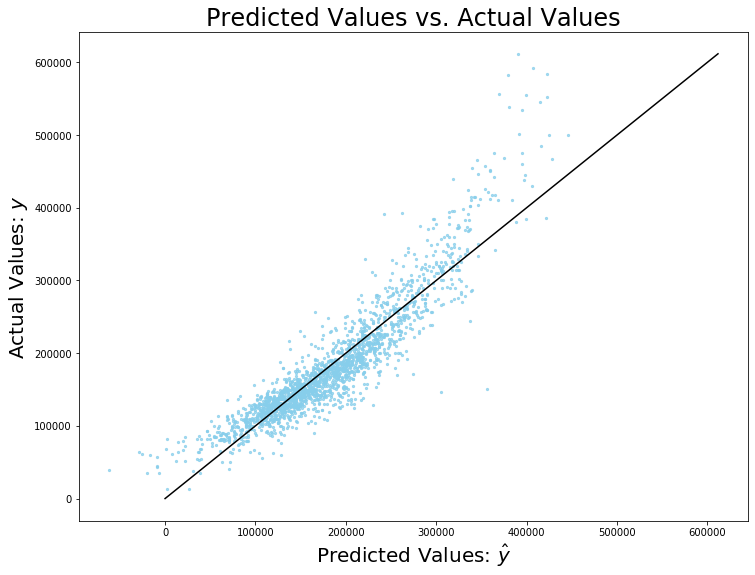

In [318]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_hat, y, s=5, color='skyblue', alpha = 0.75)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);
plt.savefig("./assets/model1.png")

In [319]:
file_name = './pickles/linear_model_v1.sav'
pickle.dump(train_model, open(file_name, 'wb'))

### Attempt 2

On this attempt I am adding more ordinal variables to make the model more complex. I will also apply a log function to transform price since it I noticed it has a right skew.

In [320]:
df = pickle.load(open('./pickles/Clean_DataFrame_v3.pkl', 'rb'))

In [321]:
y =  np.log(df['saleprice'])
X = df[['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', 
        'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add','full_bath', 'totrms_abvgrd','mas_vnr_area', 'fireplaces', 
        'bsmtfin_sf_1', 'bsmt_qual', 'exter_qual', 'kitchen_qual']]

In [322]:
log_model = LinearRegression()
log_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
y_hat = log_model.predict(X)

I'm applying the inverse of a log to scale back the price so we can intepret the graphs correctly.

In [324]:
np.sqrt(metrics.mean_squared_error(np.exp(y), np.exp(y_hat)))

23994.320075006653

In [325]:
metrics.r2_score(y, y_hat)

0.875056087320612

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)
cross_val_score(log_model, X_train, y_train, cv = 5).mean()

0.8664138466659963

In [327]:
print(log_model.score(X_train, y_train))
print(log_model.score(X_test, y_test))

0.868228879658023
0.8971066602216311


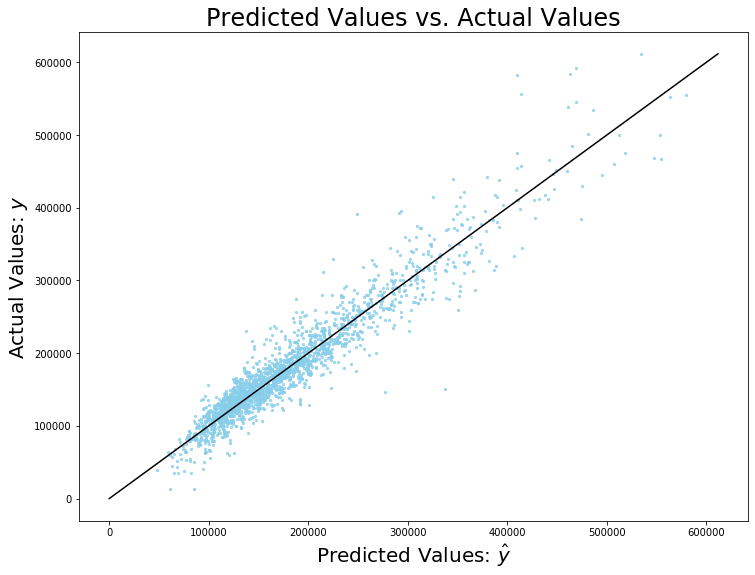

In [328]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(np.exp(y_hat), np.exp(y), s=5, color='skyblue', alpha = 0.75)

# Plot a line.
plt.plot([0, np.exp(np.max(y))],
         [0, np.exp(np.max(y))],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

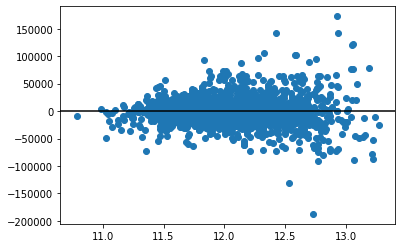

In [329]:
resids = np.exp(y) - np.exp(y_hat)
plt.scatter(y_hat, resids)
plt.axhline(0, color ='black');

In [330]:
file_name = './pickles/linear_model_v2.sav'
pickle.dump(train_model, open(file_name, 'wb'))

### Attempt 3

In [331]:
y =  np.log(df['saleprice'])
X = df[['overall_qual', 'gr_liv_area', 'garage_area', 
         '1st_flr_sf', 'year_built', 'year_remod/add','full_bath','mas_vnr_area', 'fireplaces', 'bsmt_qual', 'kitchen_qual']]

In [332]:
log_model = LinearRegression()
log_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [333]:
y_hat = log_model.predict(X)

In [334]:
np.sqrt(metrics.mean_squared_error(np.exp(y), np.exp(y_hat)))

25303.727425003162

In [335]:
metrics.r2_score(y, y_hat)

0.8625358953003385

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 39)
cross_val_score(log_model, X_train, y_train, cv = 5).mean()

0.8643180585484146

In [337]:
log_model.score(X_train, y_train)

0.868757322144942

In [338]:
log_model.score(X_test, y_test)

0.8439340442230078

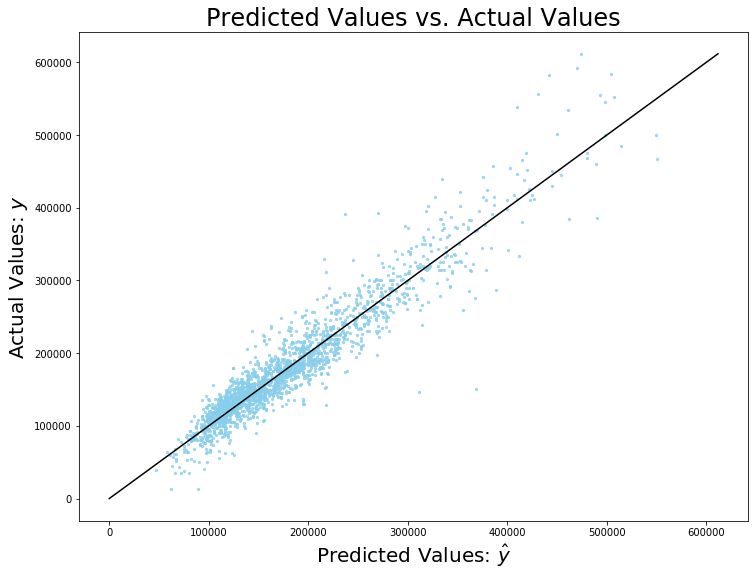

In [339]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(np.exp(y_hat), np.exp(y), s=5, color='skyblue', alpha = 0.75)

# Plot a line.
plt.plot([0, np.exp(np.max(y))],
         [0, np.exp(np.max(y))],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

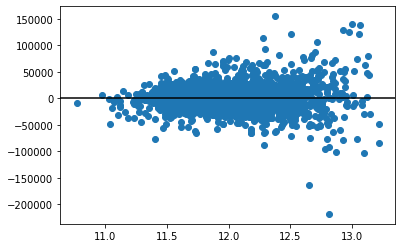

In [340]:
resids = np.exp(y) - np.exp(y_hat)
plt.scatter(y_hat, resids)
plt.axhline(0, color ='black');

### Attempt 4

- Took a more agressive approach that included most variables with a correlation with saleprice. The similar results between the test-train split suggests this approach isn't overfitting.

In [341]:
y =  np.log(df['saleprice'])
X = df[['overall_qual', 'overall_cond', 'ms_subclass','enclosed_porch', 'gr_liv_area', 'garage_area', 
         '1st_flr_sf', 'total_bsmt_sf', 'year_built', 'year_remod/add','full_bath'
        ,'mas_vnr_area', 'fireplaces', 'bsmtfin_sf_1', 'bsmtfin_sf_2','lot_frontage', 
        'lot_area', 'screen_porch', 'open_porch_sf', 'mo_sold','bsmt_qual', 'kitchen_qual',
              'exter_qual', 'heating_qc', 'fireplace_qu', 'garage_finish', 'foundation_pconc', 'bsmtfin_type_1_glq', 'neighborhood_nridght','neighborhood_stonebr', 'mas_vnr_type_none', 'overall_livingarea']]

In [342]:
log_model = LinearRegression()
log_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [343]:
y_hat = log_model.predict(X)

In [344]:
np.sqrt(metrics.mean_squared_error(np.exp(y), np.exp(y_hat)))

21539.744899171856

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 69)
cross_val_score(log_model, X_train, y_train, cv = 5).mean()

0.8937128071353136

In [346]:
print(log_model.score(X_train, y_train))
print(log_model.score(X_test, y_test))

0.9023459440175382
0.9051693662977874


In [347]:
np.exp(log_model.intercept_)

43.728592733785746

In [348]:
np.exp(log_model.coef_)

array([1.10259467, 1.05609111, 0.99962413, 1.00010564, 1.00037359,
       1.00011142, 1.00002704, 1.00006848, 1.00285898, 1.0003461 ,
       1.00185489, 1.00003368, 1.02313853, 1.00010798, 1.00005841,
       1.00066409, 1.00000362, 1.0002787 , 0.99999919, 1.00074255,
       1.01945479, 1.02256945, 1.02273121, 1.01873835, 1.00580995,
       1.01266184, 1.02387253, 1.00159605, 1.05017193, 1.09963556,
       1.0139187 , 1.00956964, 0.99998093])

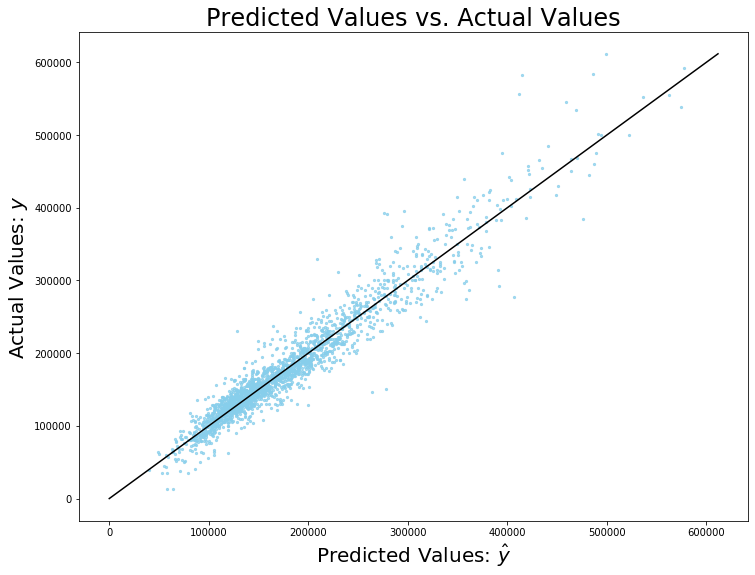

In [349]:
# Plot the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(np.exp(y_hat), np.exp(y), s=5, color='skyblue', alpha = 0.75)

# Plot a line.
plt.plot([0, np.exp(np.max(y))],
         [0, np.exp(np.max(y))],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);
plt.savefig("./assets/final_model.png")

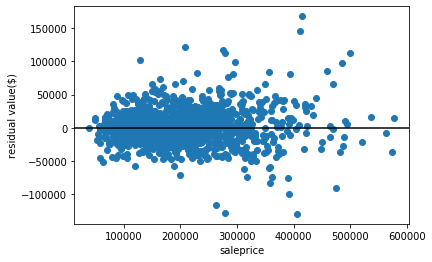

In [350]:
resids = np.exp(y) - np.exp(y_hat)
plt.scatter(np.exp(y_hat), resids)
plt.axhline(0, color ='black');
plt.xlabel('saleprice');
plt.ylabel('residual value($)');
plt.savefig("./assets/resids.png")

In [351]:
file_name = './pickles/linear_model_v3.sav'
pickle.dump(train_model, open(file_name, 'wb'))

In [352]:
X = sm.add_constant(X)
y = np.log(df["saleprice"])
model = sm.OLS(y, X).fit()

/Users/brendan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [353]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     569.0
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:11:18   Log-Likelihood:                 1303.7
No. Observations:                2048   AIC:                            -2539.
Df Residuals:                    2014   BIC:                            -2348.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7780      0.491      7.696      0.000       2.815       4.741
overall_qual             0.0977      0.007     13.971      0.000       0.084       0.111
overall_cond             0.0546      0.003     16.783      0.000       0.048       0.061
ms_subclass             -0.0004   8.38e-05     -4.487      0.000      -0.001      -0.000
enclosed_porch           0.0001   5.29e-05      1.997      0.046     1.9e-06       0.000
gr_liv_area              0.0004   2.88e-05     12.979      0.000       0.000       0.000
garage_area              0.0001   1.87e-05      5.958      0.000    7.47e-05       0.000
1st_flr_sf            2.704e-05   1.63e-05      1.660      0.097   -4.91e-06     5.9e-05
total_bsmt_sf         6.848e-05   1.52e-05      4.520      0.000    3.88e-05    9.82e-05
year_built               0.0029      0.000     14.884      0.000       0.002       0.003
year_remod/add           0.0003      0.000      1.522      0.128     -0.0001       0.001
full_bath                0.0019      0.008      0.235      0.814      -0.014       0.017
mas_vnr_area          3.368e-05   2.58e-05      1.307      0.192   -1.69e-05    8.42e-05
fireplaces               0.0229      0.010      2.366      0.018       0.004       0.042
bsmtfin_sf_1             0.0001   9.23e-06     11.699      0.000    8.99e-05       0.000
bsmtfin_sf_2          5.841e-05   1.81e-05      3.222      0.001    2.29e-05     9.4e-05
lot_frontage             0.0007      0.000      3.853      0.000       0.000       0.001
lot_area              3.617e-06    5.1e-07      7.086      0.000    2.62e-06    4.62e-06
screen_porch             0.0003   5.18e-05      5.375      0.000       0.000       0.000
open_porch_sf         -8.13e-07   4.74e-05     -0.017      0.986   -9.38e-05    9.22e-05
mo_sold                  0.0007      0.001      0.707      0.480      -0.001       0.003
bsmt_qual                0.0193      0.006      3.479      0.001       0.008       0.030
kitchen_qual             0.0223      0.007      3.142      0.002       0.008       0.036
exter_qual               0.0225      0.009      2.521      0.012       0.005       0.040
heating_qc               0.0186      0.004      4.712      0.000       0.011       0.026
fireplace_qu             0.0058      0.003      1.679      0.093      -0.001       0.013
garage_finish            0.0126      0.004      2.810      0.005       0.004       0.021
foundation_pconc         0.0236      0.009      2.528      0.012       0.005       0.042
bsmtfin_type_1_glq       0.0016      0.009      0.180      0.857      -0.016       0.019
neighborhood_nridght     0.0490      0.015      3.312      0.001       0.020       0.078
neighborhood_stonebr     0.0950      0.023      4.126      0.000       0.050       0.140
mas_vnr_type_none        0.0138      0.009      1.568    

### Ridge Model

Before running this model we will need to standardize our data so they are evaluated on the same scale.

In [354]:
from sklearn.preprocessing import StandardScaler

Instantiating and fitting data to Standard Scaler.

In [355]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [356]:
from sklearn.linear_model import Ridge

In [357]:
#fitting ridge model. Using random alpha for now
ridge = Ridge(alpha = 10)
ridge.fit(Z_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [358]:
#scoring the model
print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

0.9025142411542906
0.9010984870362868


In [359]:
#compare to scores of MLR model
print(log_model.score(X_train, y_train))
print(log_model.score(X_test, y_test))

0.9023459440175382
0.9051693662977874


Now I need to figure out optimal alpha to use. We will use Ridge cross validation to calculate an optimal alpha.

In [360]:
from sklearn.linear_model import RidgeCV

In [361]:
#alphas range between 10^0 and 10^5.
alphas_ridge = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas=alphas_ridge, scoring ='r2', cv=5)
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [362]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.9028453490967966
0.9014392221681906


Looks like the score barely improves. Since our Ridge model results are so similar to our MLR model, this means our MLR model is not overfit.

### LASSO Model

In [363]:
#reminder of MLR model scores for reference.
print(log_model.score(X_train, y_train))
print(log_model.score(X_test, y_test))

0.9023459440175382
0.9051693662977874


In [364]:
from sklearn.linear_model import LassoCV

In [365]:
alphas_lasso = np.logspace(-3, 0, 100)
lasso_cv = LassoCV(alphas = alphas_lasso, cv = 5)

#fitting with standardized data from Ridge Model section
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [366]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.90153536554124
0.9012809863238771
